<a href="https://colab.research.google.com/github/Tanveer132/Classfication-Types-in-Machine-Learning/blob/main/FST_Practice_KNN(iris_data%2CHyperTunning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Nearest Neighbors Classification

data - iris data

model - KNeighborsClassifier()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
#encoding labels
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [6]:
x=df.drop(columns='species')
y=df['species']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [7]:
model=KNeighborsClassifier()
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)


Accuracy : 0.9666666666666667
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



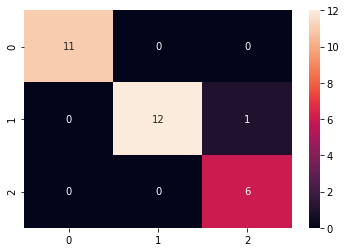

In [9]:
#Check accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report",report)
sns.heatmap(cm,annot=True)

#K Nearest Neighbors Classification- Tunning Hyperparameters

data - iris data

model - KNeighborsClassifier()

    parameters :

    n_neighbors - int, optional (default = 5)

    metric - "euclidean","manhattan","minkowski"

    weights -
    'uniform' : uniform weights.  All points in each
    neighborhood are weighted equally.
    'distance' : weight points by the inverse of their distance.
    in this case, closer neighbors of a query point will have a greater
    influence than neighbors which are further away.    

In [15]:
# help(KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [17]:
#estimator
model=KNeighborsClassifier()

#Parameters
params={"n_neighbors":range(1,31),
        "weights":['uniform','distance'],
        "metric":["euclidean","manhattan","minkowski"]}

#Cross validator
#n_repeats=3/5/10, n_splits is always 10
kfold=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [18]:
grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=kfold,scoring='accuracy',n_jobs=1)
result=grid_cv.fit(xtrain,ytrain)

In [19]:
print(result.best_params_)
print(result.best_score_)

{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.9638888888888889


In [20]:
model=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 8, weights= 'uniform')
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

Accuracy : 1.0
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



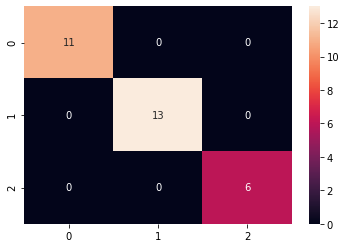

In [21]:
#Check accuracy
acc=accuracy_score(ytest,ypred)
report=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print("Accuracy :",acc)
print("Report",report)
sns.heatmap(cm,annot=True)